# Урок 4. Структури даних II
## Частина 1. Стек, чергу, дерево, купа, граф
#### стек
Стек (іноді кажуть "магазин / обойма" - за аналогією з магазином вогнепальної зброї) - це впорядкована колекція елементів, де додавання нового або видалення існуючого завжди відбувається тільки на одному з кінців. Цей кінець зазвичай називають "вершиною", а протилежний йому - "підставою".

Організований за принципом LIFO, last-in, first-out (англ. «Останнім прийшов - першим вийшов»). Він надає впорядкування за часом перебування в колекції. Більш нові елементи розташовані ближче до вершини, більш старі - ближче до основи.

#### Операції зі стеком
Stack () - створює новий порожній стек. Параметри не потрібні, повертає порожній стек.

push (item) - додає новий елемент на вершину стека. Як параметр виступає елемент; функція нічого не повертає.

pop () - видаляє верхній елемент з стека. Параметри не потрібні, функція повертає елемент. Стек змінюється.

peek () - повертає верхній елемент стека, але не видаляє його. Параметри не потрібні, стік не модифікується.

isEmpty () - перевіряє стек на порожнечу. Параметри не потрібні, повертає логічне значення.

size () - повертає кількість елементів в стеку. Параметри не потрібні, тип результату - ціле число.

### Реалізація за допомогою списку


In [1]:
class Stack:
     def __init__(self):
         self.items = []

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[-1]

     def size(self):
         return len(self.items)

In [2]:
s = Stack()
s.push('hello')
s.push('true')
print(s.pop())
print(s.pop())
print(s.pop())

true
hello


IndexError: pop from empty list

### Реалізація стека, знайдена на Code Review.

#### черга
Черга - це впорядкована колекція елементів, в якій додавання нових відбувається з одного кінця, званого "хвіст черги", а видалити їх - з іншого, "голови черги". Як тільки елемент додається в кінець черги, він починає свій шлях до її початку, чекаючи видалення попередніх.

Найостанніші з доданих в чергу одиниць повинні чекати в кінці колекції. Елемент, який пробув у черзі довше за все, знаходиться в її початку. Такий принцип упорядкування іноді називають FIFO, first-in first-out (англ. "Першим прийшов - першим вийшов"). Ще він відомий, як "першим прийшов - першим обслужений"

### Операції з чергою
- Queue () створює нову порожню чергу. Не має потреби в параметрах, повертає порожню чергу.
- enqueue (item) додає новий елемент в кінець черги. Вимагає елемент як параметр, нічого не повертає.
- dequeue () видаляє з черги передній елемент. Не має потреби в параметрах, повертає елемент. Черга змінюється.
- isEmpty () перевіряє чергу на порожнечу. Не має потреби в параметрах, повертає логічне значення.
- size () повертає кількість елементів в черзі (ціле число). Не має потреби в параметрах.

In [3]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)

### Симуляція: Hot Potato
Одне з типових програм для демонстрації черзі в дії - це симуляція реальної ситуації, яка вимагає управління даними в манері FIFO. Для початку давайте розглянемо дитячу гру Hot Potato. У цій грі (див. Малюнок) діти шикуються в коло і перекидають предмет від сусіда до сусіда так швидко, як тільки можуть. В деякий момент гри дія зупиняється, і дитина, у якого в руках залишився предмет (картопля), вибуває з кола. Гра продовжується до тих пір, поки не залишиться єдиний переможець.

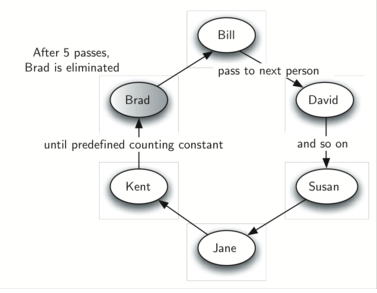

In [5]:
from IPython.display import Image
Image("C:/Users/XTreme.ws/Desktop/Python/test29.png")

Для симуляції кола ми будемо використовувати чергу

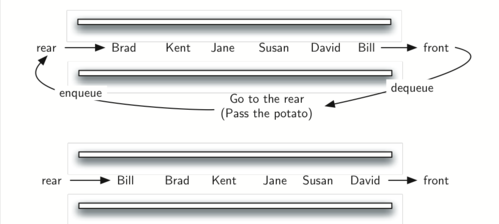

In [6]:
from IPython.display import Image
Image("C:/Users/XTreme.ws/Desktop/Python/test30.png")

In [7]:
def hotPotato(namelist, num):
    simqueue = Queue()
    for name in namelist:
        simqueue.enqueue(name)
    
    print(simqueue.items)
    while simqueue.size() > 1:
        for i in range(num):
            simqueue.enqueue(simqueue.dequeue())
    
        simqueue.dequeue()
    print(simqueue.items)
    return simqueue.dequeue()

print(hotPotato(["Bill","David","Susan","Jane","Kent","Brad"],1))

['Brad', 'Kent', 'Jane', 'Susan', 'David', 'Bill']
['Kent']
Kent


Приклад використання queue - симуляція підтвердження реєстрації користувачів на будь-якому ресурсі

In [8]:
from queue import Queue

unconfirmed_users_queue = Queue()

def user_registration(user):
    global unconfirmed_users_queue
    unconfirmed_users_queue.put(user)
    print("User {0} registered".format(user))
    
def confirm_users():
    print("Confirming users (FIFO)")
    global unconfirmed_users_queue
    while not unconfirmed_users_queue.empty():
        user = unconfirmed_users_queue.get()
        print("User {0} confirmed".format(user))

def register_several_users(): 
    user=''

    while True:
        user = input()
        if user == "quit":
            break
        else:
            user_registration(user)

register_several_users()
confirm_users()

Alex
User Alex registered
ase
User ase registered
quit
Confirming users (FIFO)
User Alex confirmed
User ase confirmed


## дерева
#### Основні поняття
Вузол - це основна частина дерева. Він може мати назву, яку ми будемо називати "ключем". Також вузол може містити додаткову інформацію, яку ми будемо називати "корисним навантаженням". Хоча в багатьох алгоритмах для дерев їй не приділяється достатньо уваги, для додатків, що використовують цю структуру даних, вона часто виявляється критичним фактором

Гілка - інша фундаментальна частина дерева. Вона з'єднує два вузли разом, показуючи наявність між ними певних відносин. Кожен вузол (крім кореня) має рівно одну вхідну гілку. При цьому він може мати кілька вихідних гілок.

Корінь дерева - єдиний вузол, який не має вхідних гілок

Шлях - це впорядкований список вузлів, з'єднаних гілками.

Висота - дерева дорівнює максимальному рівню будь-якого його вузла.

Визначення 1: Дерево складається з набору вузлів і набору гілок, що з'єднують пари вузлів. Воно має такі властивості:

Один з вузлів дерева визначений, як його корінь.
Кожен вузол n (крім кореневого) з'єднується гілкою з єдиним іншим вузлом p, де p - батько n.
Кожен вузол з'єднаний з коренем єдино можливим шляхом.
Якщо кожен з вузлів дерева має максимум двох нащадків, то така структура називається двійковим деревом.

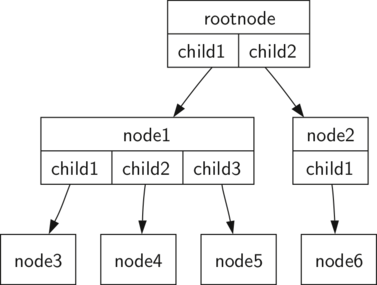

In [9]:
from IPython.display import Image
Image("C:/Users/XTreme.ws/Desktop/Python/test31.png")

Визначення 2: Дерево або порожня, або містить корінь і нуль або більше піддерев, кожне з яких теж є деревом. Корінь кожного поддерева з'єднаний гілкою з батьківським деревом.

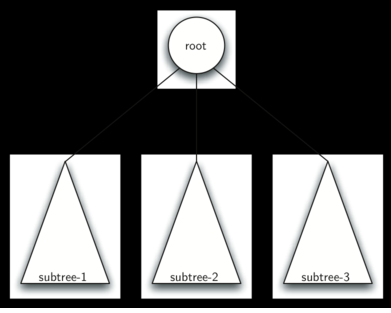

In [10]:
from IPython.display import Image
Image("C:/Users/XTreme.ws/Desktop/Python/test32.png")

Зображена на малюнку вище структура має як мінімум чотири вузли, оскільки кожен з трикутників, що становлять піддерева, повинен мати корінь. У цьому дереві може бути набагато більше вузлів, але сказати точніше можна до тих пір, поки ми не просунемося по ньому глибше.

### Реалізація з використанням спісков
У дереві, представленому як список списків, на першій позиції ми будемо зберігати значення кореневого вузла. Другий елемент сам по собі буде списком і представить ліве піддерево. Третій елемент стане правим піддерево. Щоб проілюструвати таку техніку зберігання, розглянемо приклад

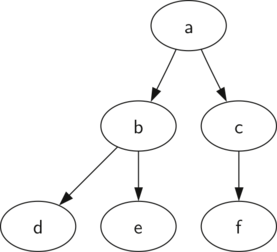

In [11]:
from IPython.display import Image
Image("C:/Users/XTreme.ws/Desktop/Python/test33.png")

In [ ]:
myTree = ['a',   #root
      ['b',  #left subtree
       ['d' [], []],
       ['e' [], []] ],
      ['c',  #right subtree
       ['f' [], []],
       [] ]
     ]

Зверніть увагу, що у нас є доступ до кожного з піддерев з використанням стандартної списковому індексації. Корінь дерева - myTree [0], ліве піддерево - myTree [1], праве - myTree [2].

In [13]:
myTree = ['a', ['b', ['d',[],[]], ['e',[],[]] ], ['c', ['f',[],[]], []] ]
print(myTree)
print('left subtree = ', myTree[1])
print('root = ', myTree[0])
print('right subtree = ', myTree[2])
print(myTree[1][2][0])

['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]
left subtree =  ['b', ['d', [], []], ['e', [], []]]
root =  a
right subtree =  ['c', ['f', [], []], []]
e


Давайте формалізуємо це визначення за допомогою деяких функцій, які зроблять простіше використання списків як дерев. Зверніть увагу, ми не збираємося визначати новий клас для двійкового дерева. Функції, які будуть написані, всього лише допоможуть маніпулювати стандартні списком, з яким ми працюємо, як з деревом.

In [14]:
def BinaryTree(r):
    return [r, [], []]

def insertLeft(root, newBranch):
    t = root.pop(1)
    if len(t) > 1:
        root.insert(1,[newBranch,t,[]])
    else:
        root.insert(1,[newBranch, [], []])
    return root

def insertRight(root, newBranch):
    t = root.pop(2)
    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
    else:
        root.insert(2,[newBranch,[],[]])
    return root

def getRootVal(root):
    return root[0]

def setRootVal(root,newVal):
    root[0] = newVal

def getLeftChild(root):
    return root[1]

def getRightChild(root):
    return root[2]

r = BinaryTree(3)
insertLeft(r,4)
insertLeft(r,5)
insertRight(r,6)
insertRight(r,7)
l = getLeftChild(r)
print(l)

setRootVal(l,9)
print(r)
insertLeft(l,11)
print(r)
print(getRightChild(getRightChild(r)))

[5, [4, [], []], []]
[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


### Реалізація за допомогою посилань і вузлів
Наш другий спосіб представлення дерев буде використовувати вузли і посилання. Для цього випадку ми визначимо клас, чиїми атрибутами стануть кореневе значення і ліве і праве піддерева.

Почнемо з простого визначення класу для варіанту з вузлами і посиланнями. Важливо пам'ятати, що в цій виставі атрибути left і right є посиланнями на інші сутності класу BinaryTree. Наприклад, коли ми вставляємо нового лівого нащадка в дерево, ми створюємо інший об'єкт BinaryTree і змінюємо self.leftChild кореня, щоб цей атрибут посилався на нове дерево.

In [16]:
class BinaryTree:
    def __init__(self, rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

Далі давайте розглянемо функцію, яку потрібно написати для будівництва дерева за межі кореневого значення. Щоб додати лівого нащадка в дерево, ми створимо новий об'єкт двійкового дерева і помістимо в його атрибут кореня left посилання на новий об'єкт.

In [17]:
def insertLeft(self, newNode):
    if self.leftChild == None:
        self.leftChild = BinaryTree(newNode)
    else:
        t = BinaryTree(newNode)
        t.leftChild = self.leftChild
        self.leftChild = t

Нам необхідно розглянути два випадки вставки. Перший - для вузла, у якого немає лівого нащадка. У цьому варіанті вузол просто вставляється в дерево. Другий варіант характеризується вузлом, що має лівого нащадка. Тоді нам треба вставити новий вузол і спустити наявного нащадка на один рівень нижче.

Код для insertRight повинен містити симетричний набір випадків. Тут також може або бути відсутнім правий нащадок, або існувати необхідність вставити вузол між коренем і наявним правим нащадком

In [18]:
def insertRight(self,newNode):
    if self.rightChild == None:
        self.rightChild = BinaryTree(newNode)
    else:
        t = BinaryTree(newNode)
        t.rightChild = self.rightChild
        self.rightChild = t

Завершуючи наше визначення простого двійкового дерева, напишемо методи доступу до кореня, правого і лівого нащадкам

In [19]:
def getRightChild(self):
    return self.rightChild

def getLeftChild(self):
    return self.leftChild

def setRootVal(self,obj):
    self.key = obj

def getRootVal(self):
    return self.key

Підводячи підсумок виконаної роботи:

In [20]:
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t


    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key
    
#     def __str__(self):
#         if self.getRootVal():
#             print(self.getRootVal())


r = BinaryTree('a')
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')
print(r.getLeftChild())
print(r.getLeftChild().getRootVal())
r.insertRight('c')
print(r.getRightChild())
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello')
print(r.getRightChild().getRootVal())

a
None
b
c
hello


### купа
Купа - бінарне дерево. А це означає, що кожен батьківський елемент має два дочірніх. І хоча ми називаємо цю структуру даних купою, але виражається вона через звичайний масив. Висота гори - приблизно ціла частина log (n), де n - кількість елементів.
Кілька простих функцій для роботи з купами:

In [21]:
global heap
global currSize

def parent(i): #Получить индекс родителя для i-того элемента
    return i/2

def left(i): #Получить левый дочерний элемент от i-того
    return 2*i

def right(i): #Получить правый дочерний элемент от i-того
    return (2*i + 1)

#### Додавання елемента в існуючу купу

Для початку ми додаємо елемент в самий низ купи, тобто в кінець масиву. Потім ми міняємо його місцями з батьківським елементом до тих пір, поки він не стане на своє місце.

#### алгоритм:

- Додаємо елемент в самий низ купи.
- Порівнюємо доданий елемент з батьківським; якщо порядок вірний - зупиняємося.
- Якщо немає - міняємо елементи місцями, і повертаємося до попереднього пункту.

In [23]:
def swap(a, b): # меняем элемент с индексом a на элемент с индексом b
    temp = heap[a]
    heap[a] = heap[b]
    heap[b] = temp

def insert(elem):
    global currSize
    
    index = len(heap)
    heap.append(elem)
    currSize += 1
    par = parent(index)
    flag = 0
    while flag != 1:
        if index == 1: #Дошли до корневого элемента
            flag = 1
        elif heap[par] > elem: #Если индекс корневого элемента больше индекса нашего элемента - наш элемент на своем месте
            flag = 1
        else: #Меняем местами родительский элемент с нашим
            swap(par, index)
            index = par
            par = parent(index)
            
    print(heap)

Максимальна кількість проходів циклу while дорівнює висоті дерева, або log (n), отже, трудомісткість алгоритму - O (log (n)).

Витяг максимального елемента купи

Перший елемент в купі - завжди максимальний, так що ми просто видалимо його (попередньо запам'ятавши), і замінимо самим нижнім. Потім ми наведемо купу в правильний порядок, використовуючи функцію: maxHeapify ()

алгоритм:

- Замінити кореневий елемент самим нижнім.
- Порівняти новий кореневий елемент з дочірніми. Якщо вони в правильному порядку - зупинитися.
Якщо немає - замінити кореневий елемент на одного з дочірніх (менший для min-heap, більший для max-heap), і повторити крок 2.

In [24]:
def extractMax():
    global currSize
    if currSize != 0:
        maxElem = heap[1]
        heap[1] = heap[currSize] # Заменяем корневой элемент - последним
        heap.pop(currSize) # Удаляем последний элемент
        currSize -= 1 # Уменьшаем размер кучи
        maxHeapify(1)
        return maxElem

def maxHeapify(index):
    global currSize
    
    lar = index
    l = left(index)
    r = right(index)

    # Вычисляем, какой из дочерних элементов больше; если он больше родительского - меняем местами
    if l <= currSize and heap[l] > heap[lar]:
        lar = l
    if r <= currSize and heap[r] > heap[lar]:
        lar = r
    if lar != index:
        swap(index, lar)
        maxHeapify(lar)

І знову максимальну кількість викликів функції maxHeapify дорівнює висоті дерева, або log (n), а значить, трудомісткість алгоритму - O (logn).

Робимо купу з будь-якого рандомних масиву

Є два шляхи зробити це. Перший - по черзі вставляти кожен елемент в купу. Це просто, але абсолютно неефективно. Трудомісткість алгоритму в цьому випадку буде O (nlogn), тому що функція O (logn) буде виконуватися n раз.

Більш ефективний спосіб - застосувати функцію maxHeapify для під-купи, від (currSize / 2) до першого елемента.

Складність вийде O (n), і доказ цього твердження, на жаль, виходить за рамки даного курсу. Інтуїція: елементи, що знаходяться в частині купи від currSize / 2 до currSize, не мають нащадків, і більшість освічених таким чином під-куп будуть заввишки менше, ніж log (n).

In [26]:
def buildHeap():
    global currSize
    for i in range(currSize/2, 0, -1): #третий агрумент в range() - шаг перебора, в данном случае определяет направление.
        print heap
        maxHeapify(i)
    currSize = len(heap)-1

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-26-50c477936418>, line 4)

### графи
#### вершина

Вершина (іноді її називають "вузол") - основна частина графа. Може мати ім'я, яке називається "ключ". Також вершина може володіти додатковою інформацією, яку ми будемо називати "корисним навантаженням".

#### ребро

Ребро (або "дуга") - інша фундаментальна частина графа. Ребро, що з'єднує дві вершини, показує наявність між ними певних відносин. Ребра можуть бути одно- і двонаправленими.

Якщо всі ребра графа односпрямовані, то ми називаємо його спрямованим графом або диграфом (від англ. Directed graph - прим. Перекладача). Показаний вище граф необхідних для профілювання предметів - явний диграф, оскільки ви зобов'язані проходити одні курси перш, ніж інші.

#### вага

Ребра можуть мати вагу, що показує вартість переміщення від однієї вершини до іншої. Наприклад, в графі доріг, що зв'язують міста, вага ребра може відображати відстань між двома населеними пунктами. Маючи на руках всі ці формулювання, ми здатні дати формальне визначення графа. Він може бути представлений як G, де G = (V, E). Тут V - безліч вершин графа, а E - безліч з'єднують їх ребер. Кожне ребро являє собою кортеж (v, w), де w, v∈V. Сюди можна додавати третій компонент, що відображає вага ребра. Подграф s - це набір ребер e і вершин v таких, що e⊂E і v⊂V.
#### шлях

Шлях в графі - це послідовність вершин, з'єднаних ребрами. Формально шлях можна визначити, як $ w_ {1}, w_ {2}, ..., w_ {n} $ такий, що $ (w_ {i}, w_ {i + 1}) $ ∈E для всіх 1 ≤ i ≤n-1.

Довжиною шляху без ваг стане кількість в ньому ребер: n-1. Зважений шлях в графі буде сумою ваг всіх вхідних в нього ребер. Наприклад, на малюнку 2 шляхом з $ V_ {3} $ в $ V_ {1} $ є послідовність вершин $ (V_ {3}, V_ {4}, V_ {0}, V_ {1}) $. Ребрами - $ {(v_ {3}, v_ {4}, 7), (v_ {4}, v_ {0}, 1), (v_ {0}, v_ {1}, 5)}. $

#### цикл

Цикл в направленому графі починається і закінчується в одній і тій же вершині. Наприклад, на малюнку 2 циклом буде шлях $ (V_ {5}, V_ {2}, V_ {3}, V_ {5}) $. Граф без циклів називається ациклічним. Спрямований граф без циклів - це ациклический спрямований граф або DAG (від англ. Directed acyclic graph - прим. Автора). Ми побачимо, що з його допомогою можна вирішити деякі важливі завдання.

Операції з графами
Graph () створює новий порожній граф.
addVertex (vert) додає в граф об'єкт типу Vertex.
addEdge (fromVert, toVert) Додає в граф нове спрямоване ребро, що з'єднує дві вершини.
addEdge (fromVert, toVert, weight) Додає в граф нове виважене спрямоване ребро, що з'єднує дві вершини.
getVertex (vertKey) знаходить в графі вершину vertKey.
getVertices () повертає список всіх вершин графа.
in повертає True для оператора форми vertex in graph, якщо дана вершина в графі є, і False в іншому випадку.
подання графа
Матриця суміжності
Одним з найпростіших способів реалізувати граф є використання двовимірної матриці. У ній кожен рядок і стовпець є вершину графа, а збережене в осередку на перетині рядка v і шпальти w значення показує, що існує ребро з вершини v до вершини w. Коли дві вершини з'єднані, ми говоримо, що вони суміжні



#### список суміжності
Більш просторово-економічним способом реалізації розрідженого графа є використання списку суміжності. У такому поданні ми зберігаємо основний список з усіх вершин об'єкта Graph, кожен з елементів якого підтримує перелік з пов'язаних з ним вершин. В нашій реалізації класу Vertex в якості останнього буде використовуватися словник, де ключами стануть вершини, а значеннями - ваги.


Перевагою такої реалізації є те, що вона дозволяє нам компактно представляти розріджені графи. Також в списку суміжності легко знайти всі посилання, безпосередньо пов'язані з конкретною вершиною.

##### Реалізація
Graph - містить основний список вершин.
Vertex - подання до графі.
Об'єкти Vertex використовуватимуть словник для відстеження суміжних вершин і ваг ребер. Називатися він буде connectedTo. Лістинг нижче показує код для класу Vertex. Конструктор просто ініціалізує id (звичайний рядок) і словник connectedTo. Метод addNeighbor використовується для додавання зв'язку даної вершини з іншого. Метод getConnections повертає всі вершини зі списку суміжності, які представлені в connectedTo. Метод getWeight повертає вага ребра з цієї вершини до переданої йому в якості параметра.

In [27]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

Клас Graph, показаний в наступному лістингу, містить словник, що відображає імена вершин на їх об'єкти. Також Graph надає методи для додавання вершин в граф і зв'язування їх один з одним. Додатково ми маємо реалізацію методу iter, що полегшує ітерації по об'єктах Vertex в конкретному графі. Разом два методи дозволяють робити ітерації по іменах вершин або безпосередньо по об'єктах.

In [28]:
class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,cost=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())